The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

c:\Users\berli\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

C:\Users\berli\AppData\Local\Temp\ipykernel_4564\1848360532.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(tokens)).colors
C:\Users\berli\AppData\Local\Temp\ipykernel_4564\1848360532.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


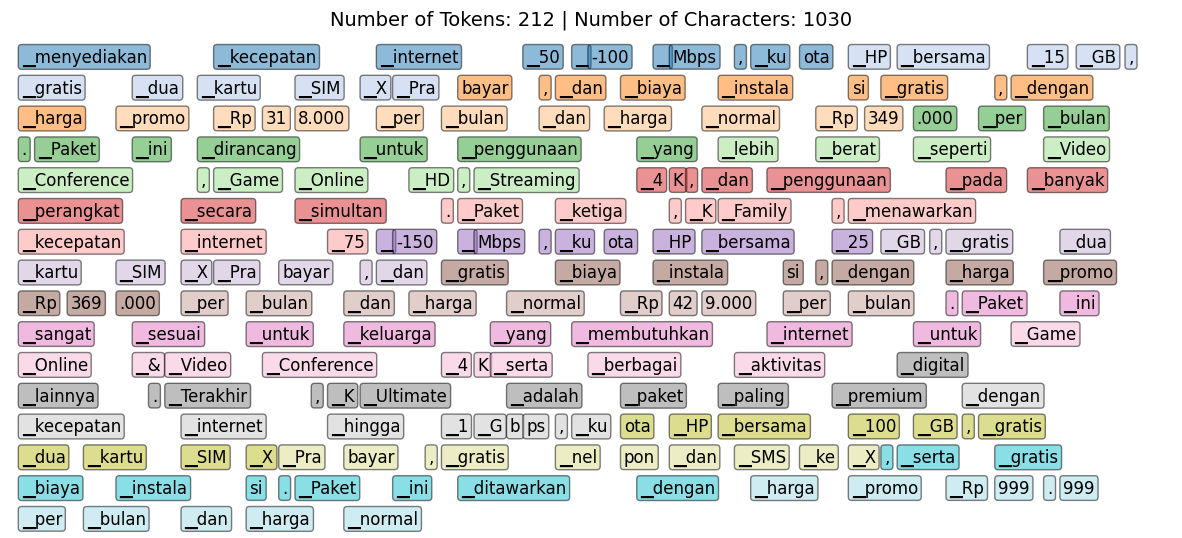

In [1]:
import matplotlib.pyplot as plt
from transformers import AutoTokenizer

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("intfloat/multilingual-e5-large")

# Text to be tokenized 
text = "menyediakan kecepatan internet 50 -100 Mbps, kuota HP bersama 15 GB, gratis dua kartu SIM X Prabayar, dan biaya instalasi gratis, dengan harga promo Rp318.000 per bulan dan harga normal Rp349.000 per bulan. Paket ini dirancang untuk penggunaan yang lebih berat seperti Video Conference, Game Online HD, Streaming 4K, dan penggunaan pada banyak perangkat secara simultan. Paket ketiga, K Family, menawarkan kecepatan internet 75 -150 Mbps, kuota HP bersama 25 GB, gratis dua kartu SIM X Prabayar, dan gratis biaya instalasi, dengan harga promo Rp369.000 per bulan dan harga normal Rp429.000 per bulan. Paket ini sangat sesuai untuk keluarga yang membutuhkan internet untuk Game Online & Video Conference 4K serta berbagai aktivitas digital lainnya. Terakhir, K Ultimate adalah paket paling premium dengan kecepatan internet hingga 1 Gbps, kuota HP bersama 100 GB, gratis dua kartu SIM X Prabayar, gratis nelpon dan SMS ke X, serta gratis biaya instalasi. Paket ini ditawarkan dengan harga promo Rp999.999 per bulan dan harga normal"

# Tokenize the text
tokens = tokenizer.tokenize(text)

# Define function to display tokenized text
def visualize_tokens(tokens):
    line_spacing = 0.2
    token_spacing = 0.014

    colors = plt.cm.get_cmap('tab20', len(tokens)).colors

    fig, ax = plt.subplots(figsize=(15, 2))
    y = 0.9  
    x = 0.01

    for i, token in enumerate(tokens):
        token_text = tokenizer.convert_ids_to_tokens(tokenizer.convert_tokens_to_ids(token))
        token_length = len(token_text)

        ax.text(x, y, token_text, va='top', ha='left', fontsize=12,
                bbox=dict(facecolor=colors[i % len(colors)], alpha=0.5, boxstyle='round,pad=0.2'))

        x += token_length * token_spacing

        next_token_length = len(tokens[i + 1]) if i < len(tokens) - 1 else 0
        if x + next_token_length * token_spacing > 0.98:
            y -= line_spacing
            x = 0.01

    ax.axis('off')
    plt.title(f"Number of Tokens: {len(tokens)} | Number of Characters: {len(text)}", fontsize=14)
    plt.tight_layout()
    plt.show()

# Visualize the tokenized text
visualize_tokens(tokens)
